In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#For basic table operation
import pandas as pd

#For work with arrays
import numpy as np

#For find pattern in text
import re

#For visualization
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")

#For processing textial data
from textblob import TextBlob

#For Tokenizing segments
from nltk.tokenize import word_tokenize

#For Stemming text
from nltk.stem import PorterStemmer

#For removing StopWords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

#For Plotting Words
from wordcloud import WordCloud

# Convert a collection of text documents to a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer

#To split data into train and test
from sklearn.model_selection import train_test_split

#For fitting model
from sklearn.linear_model import LogisticRegression

#For evaluation of model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

#For Hyper-tuning model
from sklearn.model_selection import GridSearchCV

In [2]:
df = pd.read_csv("vaccination_all_tweets.csv")
df.head(4)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197870 entries, 0 to 197869
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                197870 non-null  int64 
 1   user_name         197869 non-null  object
 2   user_location     138551 non-null  object
 3   user_description  183777 non-null  object
 4   user_created      197870 non-null  object
 5   user_followers    197870 non-null  int64 
 6   user_friends      197870 non-null  int64 
 7   user_favourites   197870 non-null  int64 
 8   user_verified     197870 non-null  bool  
 9   date              197870 non-null  object
 10  text              197870 non-null  object
 11  hashtags          154883 non-null  object
 12  source            197751 non-null  object
 13  retweets          197870 non-null  int64 
 14  favorites         197870 non-null  int64 
 15  is_retweet        197870 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [4]:
df.columns

Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')

In [5]:
# Extracting only Text attributs for analysis
text_df = df.drop(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],axis=1)
text_df.head()

,text
0,Same folks said daikon paste could treat a cyt...
1,While the world has been on the wrong side of ...
2,#coronavirus #SputnikV #AstraZeneca #PfizerBio...
3,"Facts are immutable, Senator, even when you're..."
4,Explain to me again why we need a vaccine @Bor...


In [6]:
#visualizing Raw data we have from Tweetr
print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")
print(text_df["text"].iloc[5],"\n")

Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF 

While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm 

#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P 

Facts are immutable, Senator, even when you're not ethically sturdy enough to acknowledge them. (1) You were born i… https://t.co/jqgV18kch4 

Explain to me again why we need a vaccine @BorisJohnson @MattHancock #whereareallthesickpeople #PfizerBioNTech… https://t.co/KxbSRoBEHq 

Does anyone have any useful advice/guidance for whether the COVID vaccine is safe whilst breastfeeding?… https://t.co/EifsyQoeKN 



In [7]:
def data_processing(text):
    text = text.lower()     #Converting to text to lowercase
    text = re.sub(r'https\S+|www\S+https\S+','',text,flags=re.MULTILINE)   #Removing URL
    text = re.sub(r'\@w+|\#','',text)         #Removing hashtags
    text = re.sub(r'[^\w\s]','',text)         #Removing hashtags
    text_tokens = word_tokenize(text)         #Getting tokens
    filtered_text = [w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [8]:
# Applying Data Processing function
text_df.text = text_df["text"].apply(data_processing)


In [9]:
# Removing Duplicates if any
text_df = text_df.drop_duplicates('text')


In [10]:
# Performing Stemming
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data


In [11]:
text_df["text"] = text_df["text"].apply(lambda x: stemming(x))


In [12]:
#visualizing Processed text
print(text_df["text"].iloc[0],"\n")
print(text_df["text"].iloc[1],"\n")
print(text_df["text"].iloc[2],"\n")
print(text_df["text"].iloc[3],"\n")
print(text_df["text"].iloc[4],"\n")
print(text_df["text"].iloc[5],"\n")

folks said daikon paste could treat cytokine storm pfizerbiontech 

world wrong side history year hopefully biggest vaccination effort weve ev 

coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_19 russian vaccine created last 24 years 

facts immutable senator even youre ethically sturdy enough acknowledge 1 born 

explain need vaccine borisjohnson matthancock whereareallthesickpeople pfizerbiontech 

anyone useful adviceguidance whether covid vaccine safe whilst breastfeeding 



In [13]:
#Checking data shape
print("Shape of data after processing:",text_df["text"].shape)

Shape of data after processing: (183833,)


In [14]:
#calculating polarity for categorizing text 
def polarity(text):
    return TextBlob(text).sentiment.polarity


In [15]:
text_df["polarity"] = text_df["text"].apply(polarity)
text_df.head(10)


,text,polarity
0,folks said daikon paste could treat cytokine s...,0.000
1,world wrong side history year hopefully bigges...,-0.500
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000
3,facts immutable senator even youre ethically s...,0.100
4,explain need vaccine borisjohnson matthancock ...,0.000
5,anyone useful adviceguidance whether covid vac...,0.400
6,bit sad claim fame success vaccination patriot...,-0.100
7,many bright days 2020 best 1 bidenharris winni...,0.675
8,covid vaccine getting covidvaccine covid19 pfi...,0.000
9,covidvaccine states start getting covid19vacci...,0.000


In [16]:
#  Adding Sentiment to the data frame
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [17]:
text_df['sentiment'] = text_df['polarity'].apply(sentiment)
text_df.head(10)

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.000,Neutral
1,world wrong side history year hopefully bigges...,-0.500,Negative
2,coronavirus sputnikv astrazeneca pfizerbiontec...,0.000,Neutral
3,facts immutable senator even youre ethically s...,0.100,Positive
4,explain need vaccine borisjohnson matthancock ...,0.000,Neutral
5,anyone useful adviceguidance whether covid vac...,0.400,Positive
6,bit sad claim fame success vaccination patriot...,-0.100,Negative
7,many bright days 2020 best 1 bidenharris winni...,0.675,Positive
8,covid vaccine getting covidvaccine covid19 pfi...,0.000,Neutral
9,covidvaccine states start getting covid19vacci...,0.000,Neutral


<AxesSubplot:xlabel='sentiment', ylabel='count'>

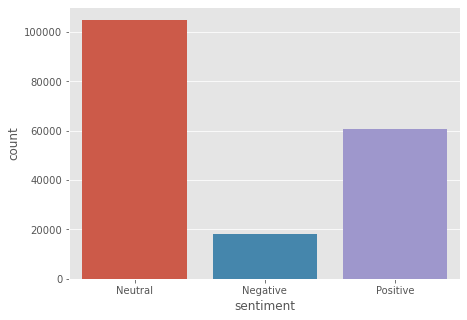

In [18]:
#Visualizing the Sentiment
fig = plt.figure(figsize=(7,5))
sns.countplot(x="sentiment",data=text_df)

Text(0.5, 1.0, 'Distribution of sentiments')

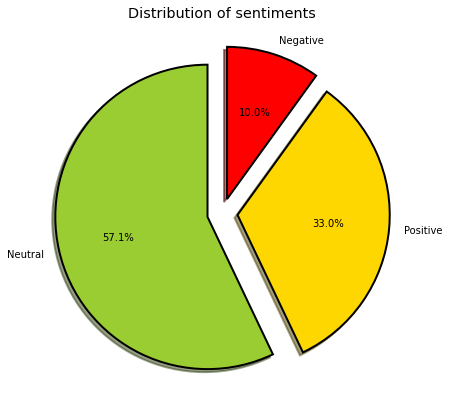

In [19]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = text_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [20]:
#Visulaizing Top 5 positive Sentiments
pos_tweets = text_df[text_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,text,polarity,sentiment
73066,best thing go get vaccinated covid19 vaccinesw...,1.0,Positive
98304,bharatbiotech covaxin best,1.0,Positive
58036,approval al perfect time sputnikv,1.0,Positive
58028,valid reasons postponement exams isnt best dec...,1.0,Positive
27377,best way end week 1st covid19 vaccine done mod...,1.0,Positive


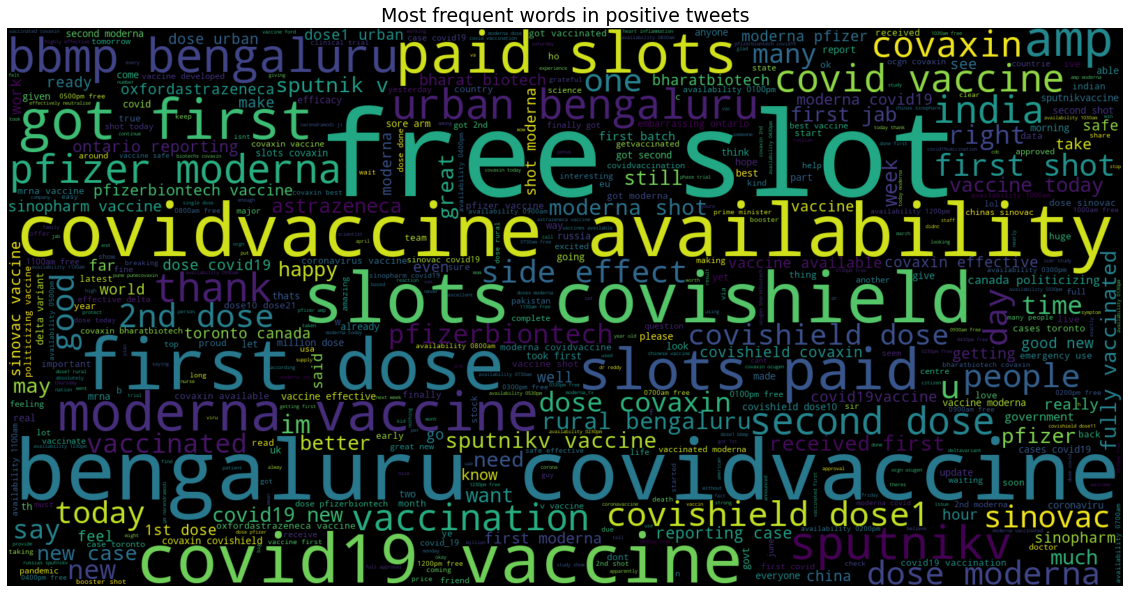

In [21]:
text = ' '.join([word for word in pos_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()


In [22]:
#Visualizing Negative Words
neg_tweets = text_df[text_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,text,polarity,sentiment
61880,woke around 1 sweaty fever broken pretty much ...,-6.938894e-18,Negative
53579,grannygail31 congrats gg first dose moderna tu...,-9.251859e-18,Negative
128724,double dosed ass currently kicked tired bit wo...,-1.110223e-17,Negative
83234,zombie translating pziser blue zombie basic sl...,-1.110223e-17,Negative
78941,older vulnerable people mrdered thats bold sta...,-1.850372e-17,Negative


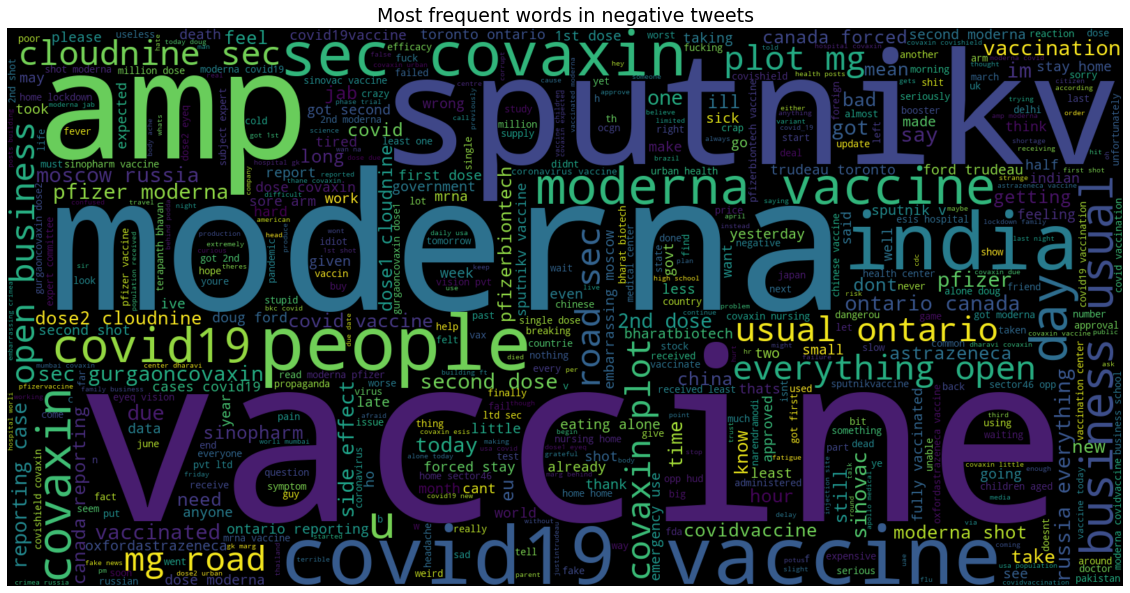

In [23]:
text = ' '.join([word for word in neg_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [24]:
#Visualizing Neutral Words
neutral_tweets = text_df[text_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,text,polarity,sentiment
0,folks said daikon paste could treat cytokine s...,0.0,Neutral
135195,560103 age 18 89d1 37d2 slots covaxin 24072021...,0.0,Neutral
135206,560066 age 18 290d1 182d2 slots covaxin 230720...,0.0,Neutral
135205,560078 age 18 42d1 16d2 slots covaxin 21072021...,0.0,Neutral
135204,560066 age 18 98d1 36d2 slots covaxin 20072021...,0.0,Neutral


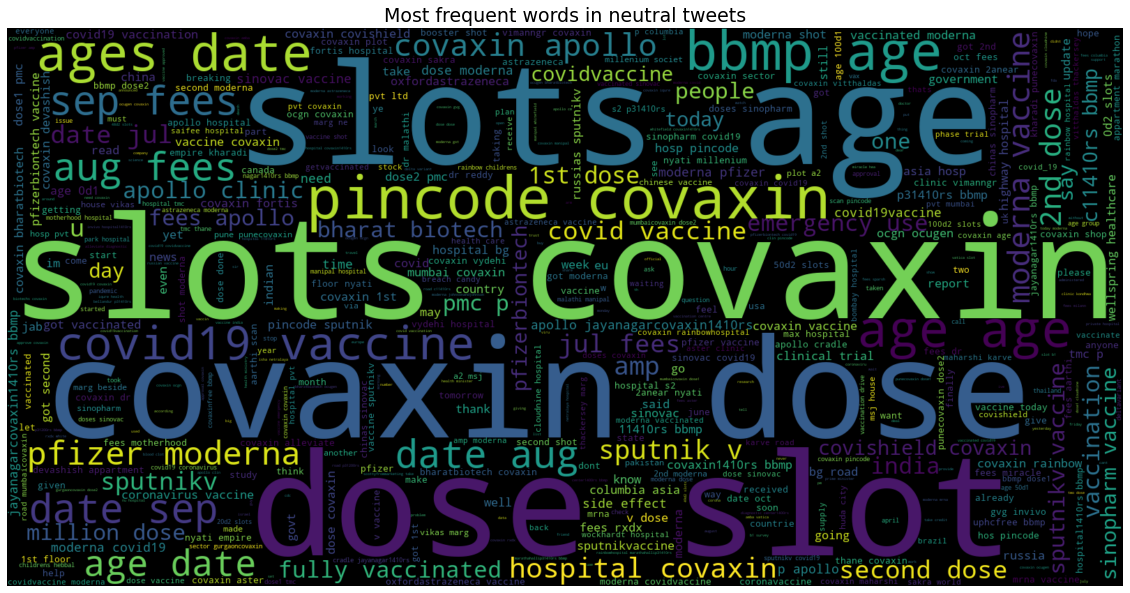

In [25]:
text = ' '.join([word for word in neutral_tweets['text']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [26]:
# Performing Vectorizing to crate bigram model
vect = CountVectorizer(ngram_range=(1,2)).fit(text_df['text'])

In [27]:
#Getting Features
feature_names = vect.get_feature_names_out()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 797187

First 20 features:
 ['00' '00 doses' '000' '000 00' '000 000the' '000 717' '000 belgium'
 '000 covid19' '000 deaths' '000 donated' '000 dose' '000 doses'
 '000 first' '000 half' '000 health' '000 initial' '000 people'
 '000 purchased' '000 sha' '000 share']


In [28]:
#seperating Independent and Depentent Variables and tranform X data
X = text_df['text']
Y = text_df['sentiment']
X = vect.transform(X)

In [29]:
# Splitting data with test 20%
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [30]:
#Checking shape of train and test data
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))


Size of x_train: (147066, 797187)
Size of y_train: (147066,)
Size of x_test: (36767, 797187)
Size of y_test: (36767,)


# LogisticRegression

In [31]:
import warnings
warnings.filterwarnings('ignore')

#Training logisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 96.58%


In [32]:
#Confusion matrix
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[ 3078   427   204]
 [   19 20861    54]
 [  125   427 11572]]


              precision    recall  f1-score   support

    Negative       0.96      0.83      0.89      3709
     Neutral       0.96      1.00      0.98     20934
    Positive       0.98      0.95      0.97     12124

    accuracy                           0.97     36767
   macro avg       0.96      0.93      0.94     36767
weighted avg       0.97      0.97      0.97     36767

